### Determining the Slope and Bias
-----
In this notebook, we will cover -- 
* Cost Surface
* Minimising the Cost Surface in PyTorch via first principles

In [58]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

### Cost Surface

The cost is the average loss or total loss, and it is a function of slope and bias. The slope of a line determines the angle of the line, thus control the relationship between x and y. The bias controls the horizontal offset of the line. With these two together, we have complete control over the line, and we can move it in any direction.


In true linear regression the cost function is - 
>$ l(w,b) = \frac{1}{N}\sum_{n=1}^N (y_n - wx_n - b)^2 $

We can plot this cost function in a 3D graph, where x-axis, y-axis and z-axis (height) represents w, b and l(w,b) respectively. We will get a cost surface in the shape of a bowl. The depth of the surface determines the value of the loss. The bottom of the surface gives the lowest loss value. Therefore when we apply gradient descent, and we aim to reach the bottom of this surface iteratively.

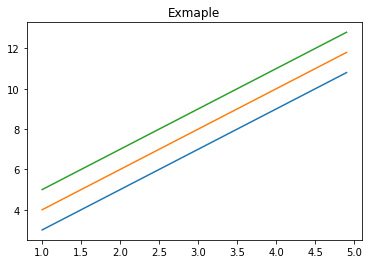

In [125]:
x = torch.arange(1.0, 5.0, 0.1, requires_grad=True)
y = x*2 + 1
plt.title("Exmaple")
plt.plot(x.detach().numpy(), y.detach().numpy())

y = x*2 + 2
plt.plot(x.detach().numpy(), y.detach().numpy())


y = x*2 + 3
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()

The line is moving with the bias

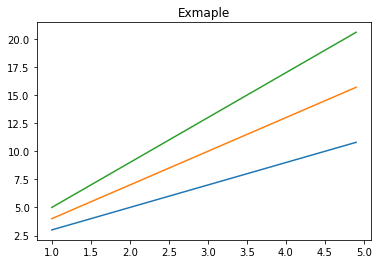

In [126]:
y = x*2 + 1
plt.title("Exmaple")
plt.plot(x.detach().numpy(), y.detach().numpy())

y = x*3 + 1
plt.title("Exmaple")
plt.plot(x.detach().numpy(), y.detach().numpy())

y = x*4 + 1
plt.title("Exmaple")
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()

The line is rotating with the slope

### Implementing Visualisation for the Gradient Descent

In [112]:
class LossVisualisation:
    
    def __init__(self, w_start, b_start, X, Y, total_sample, basic=True):
        self.sample = total_sample
        self.x = X.numpy()
        self.y = Y.numpy()
        
        # All possible Weights and Biases
        W = np.linspace(-w_start, w_start, self.sample)
        B = np.linspace(-b_start, b_start, self.sample)
        
        # Creating a mesh grid for finding the value the third axis (z)
        # w = (sample , sample) , b = (sample, sample)
        w, b = np.meshgrid(W, B)
        
        # z = (sample, sample) - because z depends on two variables w and b. 
        
        # Finding the value of z
        Z = np.zeros((self.sample, self.sample))
        count1 = 0
        for W1, B1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(W1, B1):
                Z[count1, count2] = np.mean((self.y - w2*self.x + b2)**2)
                count2+=1
            count1+=1
            
        # For future calculations
        self.w = w
        self.b = b
        self.z = Z
        self.W = []
        self.B = []
        self.LOSS = []
        self.total = 0
    
        # plot the basic chart - 
        if basic:
            plt.figure()
            #plt.figure(figsize=(7.5, 5))
            plt.title("Original Data: X vs Y")
            plt.scatter(self.x, self.y)
            plt.xlabel("X")
            plt.ylabel("Y")
            plt.show()
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.z, rstride = 1, cstride = 1,cmap = 'viridis')
            plt.title("Cost/Total Loss Surface")
            plt.xlabel("Weight")
            plt.ylabel("Bias")
            plt.show()
            plt.figure()
            plt.title("Cost/Total Loss Surface Countour")
            plt.contour(w, b, Z)
            plt.xlabel("Weight")
            plt.ylabel("Bias")
            plt.show()   
            
    def add_para_result(self, w, b, loss):
        print(w, b, loss)
        self.total+=1
        self.W.append(w)
        self.B.append(b)
        self.LOSS.append(loss)

    def plot_iteration(self):

        # Plot the line graph comparison
        plt.subplot(121)
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Data Space Iteration: {}".format(self.total))

        # Plot the contour 
        plt.subplot(122)
        plt.contour(self.w, self.b, self.z)
        plt.scatter(self.W, self.B, c='r', marker='x')
        plt.title("Total Loss Surface Contour Iteration: {}".format(self.total))
        plt.show()

    def final_plot(self):

        # Plotting both the 3D graph and Contour of Weight, Bias and Loss
        ax = plt.axes(projection='3d')
        ax.plot_wireframe(self.w, self.b, self.z, label="Training Points")
        ax.scatter(self.W, self.B, self.LOSS, c='r', marker='x', s=200, alpha=1)
        plt.figure()
        plt.contour(self.w, self.b, self.z)
        plt.scatter(self.W, self.B, c= 'r', marker='x')
        plt.xlabel("w")
        plt.ylabel("b")
        plt.show()

### Minimising the cost function in PyTorch using the first principle

Randomly initialising the value of both weight and bias.

In [120]:
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
X = torch.arange(-3.0, 3.0, 0.1).view(-1, 1)

f = 1*X-1
Y = f+0.1*torch.randn(X.size())

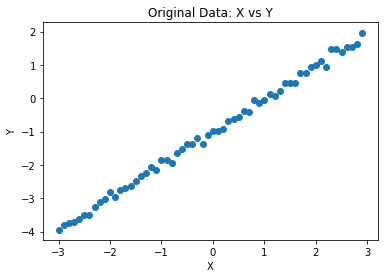

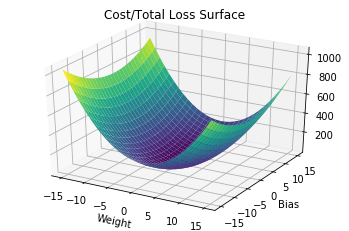

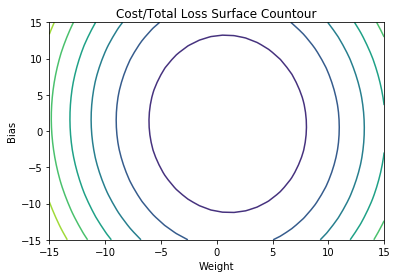

In [121]:
loss_visualisation = LossVisualisation(-15, -15, X, Y, 30, True)



The equation of a line   
>$ \hat{y} = wx + b $

In [122]:
def forward(x):
    return w*x+b

The cost function of our line
>$ l(w,b) = \frac{1}{N}\sum_{n=1}^N (y_n - wx_n - b)^2 $

In [123]:
def criterion(y_hat, y):
    return torch.mean((y_hat-y)**2)

Gradient Descent - The parameters will move to the bottom of the cost surface. 

$ w^{(k+1)} = w^k - \eta\frac{df(w^k)}{dw} $    
$ b^{(k+1)} = b^k - \eta\frac{df(b^k)}{db} $    

where w is the slope and b is the bias of the line, and $\eta$ is the learning rate.

-15.0 -10.0 833.4932250976562


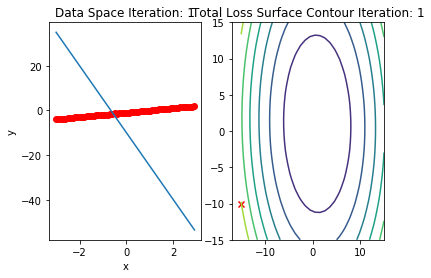

-5.494321823120117 -8.359967231750488 175.37225341796875


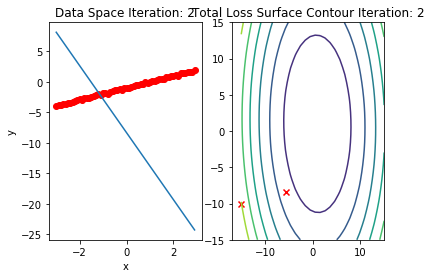

-1.678819179534912 -6.952884197235107 55.13425827026367


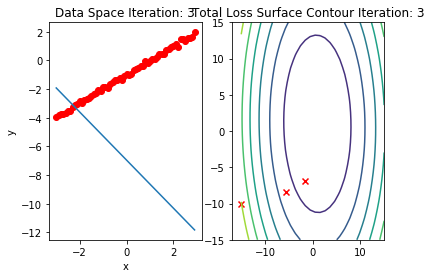

-0.13981926441192627 -5.789062976837158 26.18914031982422


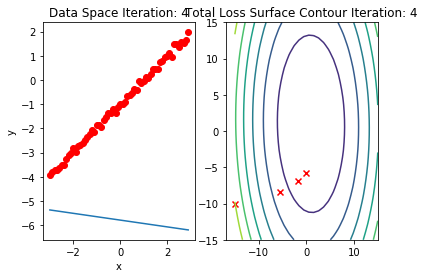

0.48690569400787354 -4.842616081237793 15.319128036499023


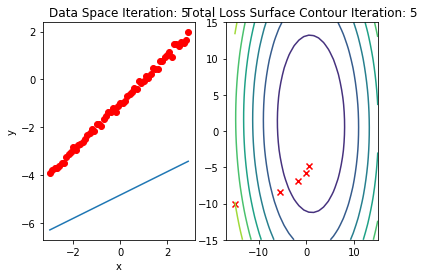

0.7468512058258057 -4.079191207885742 9.581039428710938


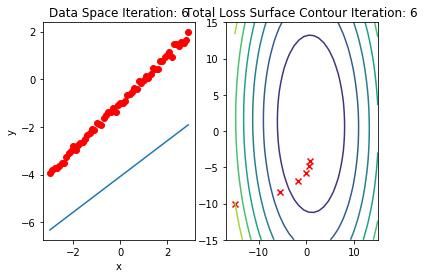

0.8583768606185913 -3.4658517837524414 6.101485729217529


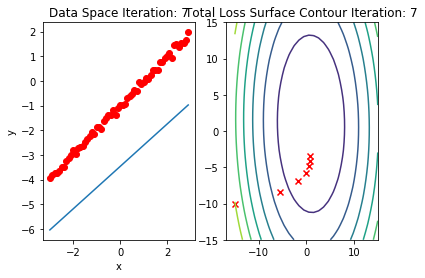

0.909083366394043 -2.974065065383911 3.904310464859009


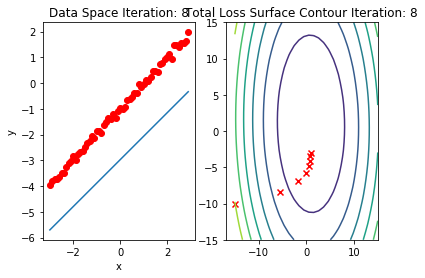

0.934266984462738 -2.5801286697387695 2.502206325531006


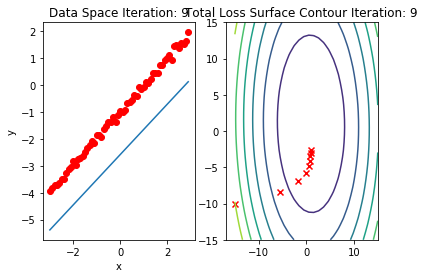

0.9482713341712952 -2.2647275924682617 1.6050912141799927


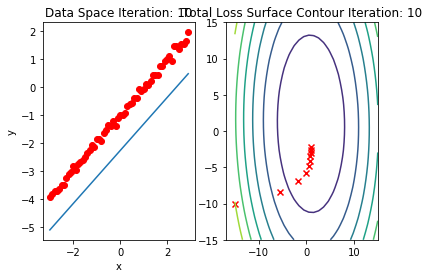

0.957022488117218 -2.0122666358947754 1.0307058095932007


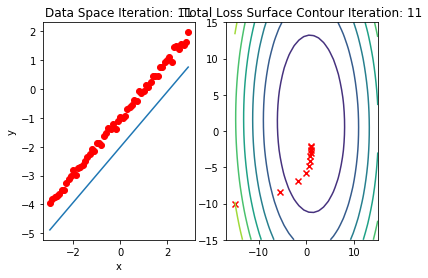

0.9630446434020996 -1.8102103471755981 0.6628898978233337


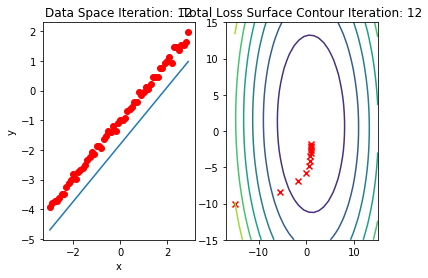

0.9674720764160156 -1.6485052108764648 0.4273439645767212


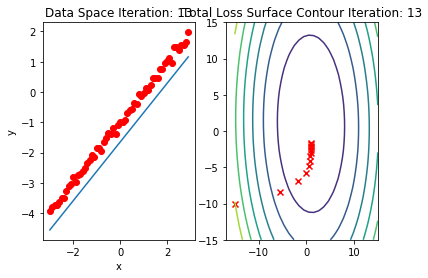

0.9708585739135742 -1.519096851348877 0.2765011489391327


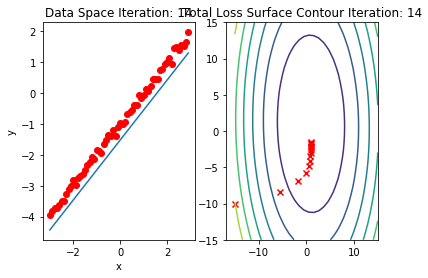

0.9735060930252075 -1.4155362844467163 0.17990151047706604


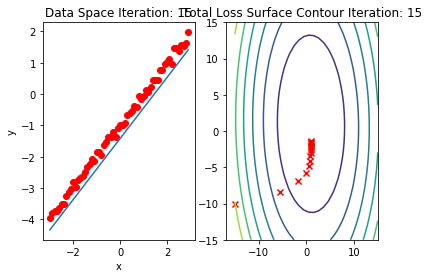

0.9755998849868774 -1.3326612710952759 0.1180391013622284


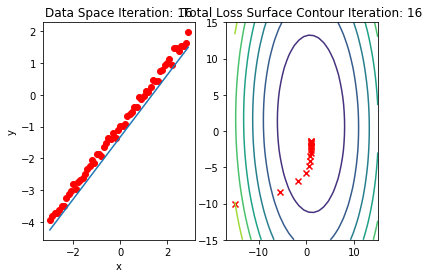

0.9772654175758362 -1.2663403749465942 0.07842247933149338


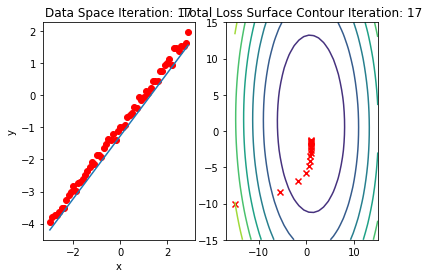

0.9785943031311035 -1.2132669687271118 0.053052015602588654


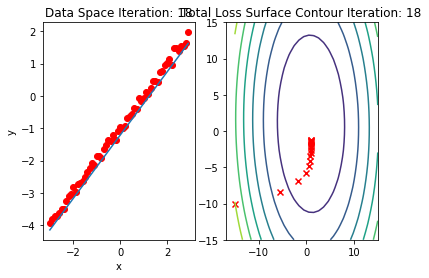

0.9796561598777771 -1.17079496383667 0.03680477663874626


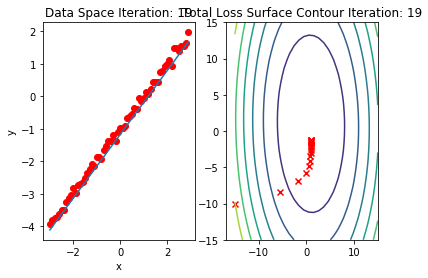

0.9805052280426025 -1.1368067264556885 0.02640005759894848


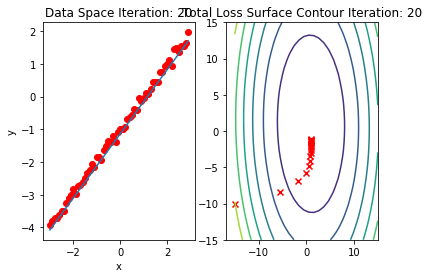

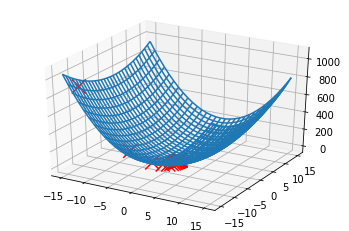

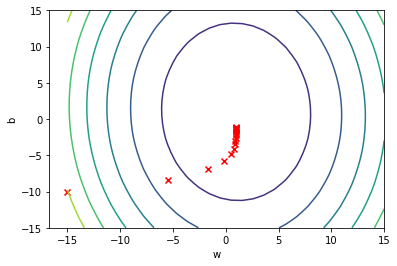

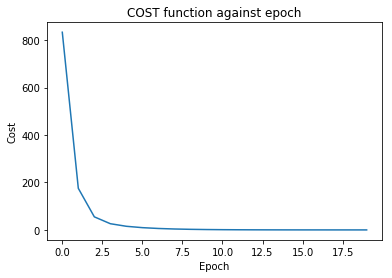

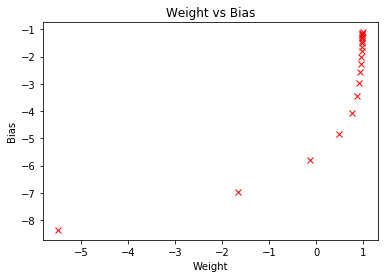

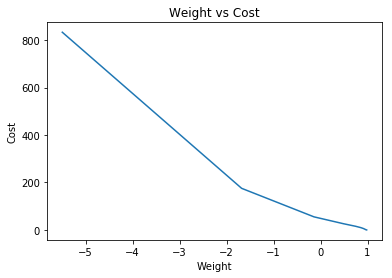

In [124]:
lr = 0.1
COST = []
WEIGHT = []
BIAS = []
for epoch in range(20):
    y_hat = forward(X)
    loss = criterion(y_hat, Y)
    loss.backward()
    loss_visualisation.add_para_result(w.data.item(), b.data.item(), loss.item())
    loss_visualisation.plot_iteration()
    COST.append(loss.item())
    w.data = w.data - lr*w.grad.data
    WEIGHT.append(w.data)
    w.grad.data.zero_()
    b.data = b.data - lr*b.grad.data
    BIAS.append(b.data)
    b.grad.data.zero_()
    
loss_visualisation.final_plot()
plt.title("COST function against epoch")
plt.plot(COST)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

plt.title("Weight vs Bias")
plt.xlabel("Weight")
plt.ylabel("Bias")
plt.plot(WEIGHT, BIAS, "rx")
plt.show()

plt.title("Weight vs Cost")
plt.xlabel("Weight")
plt.ylabel("Cost")
plt.plot(WEIGHT, COST)
plt.show()